## Thinkful Unit 4 Section 2, Clustering Challenge

Thinkful project description:

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Explore and prepare the data


In [2]:
#Read marathon data for 2013
boston13 = pd.read_csv('../Datafiles/boston_marathon_results_2013.csv')

In [3]:
boston13.shape

(16164, 21)

####  Notes about the dataset

I selected Boston Marathon race data for the year 2013.

According to the Boston Athletic Association, 17,600 runners and 52 wheelchair racers finished the race. 
Source: http://registration.baa.org/2013/cf/public/iframe_Statistics.htm]

The 2013 Marathon was the scene of a bombing that killed 3 people and injured an estimated 264 people. [Source: https://www.cbsnews.com/pictures/boston-marathon-bombing-victims/

It appears as if we have fewer records than finishers in this dataset (16,164 records vs 17,600 finishers). I'm going to continue working with this dataset anyway. Examining the csv file in a text editor, I don't see a mis-placed end of file marker. Viewing the raw data on Github, the last record matches the last record in my dataframe (see below).

According to the Github data source, wheelchair racers are included but other special groups, such as hand cyclists, are not. 

I could not find a data dictionary or data description for this source.

In [4]:
boston13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [5]:
#Check for non-data records at top and bottom of file
boston13.head(5)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [6]:
boston13.tail(5)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
16159,144.85,65,"Loy, Judy",6,57.57,F,121.98,247.47,20854,NaN,...,17014,9.45,WA,174.75,28.50,6686,115.63,204.83,Vancouver,234.48
16160,133.32,64,"Homeyer, Thomas F.",258,52.80,M,112.27,229.72,20856,NaN,...,13796,8.77,NY,161.00,26.57,9024,106.38,189.82,Tully,217.88
16161,139.83,75,"Pain, Malcolm A",3,54.97,M,117.58,239.97,20870,NaN,...,16083,9.17,NS,168.82,27.48,9994,111.45,198.42,Halifax,227.53
16162,135.38,80,"Wilson, Harold W",1,53.13,M,113.80,233.90,20907,NaN,...,14768,8.93,TX,164.02,26.93,9434,107.85,192.80,Tyler,221.42
16163,144.95,61,"Collins, Laurel M",49,57.57,F,121.55,249.15,20908,NaN,...,17144,9.52,CA,175.82,28.93,6762,115.32,206.67,Berkeley,235.85


In [7]:

boston13.groupby(['ctz'])['25k'].count().sort_values(ascending = False).head(10)

ctz
GBR    99
CAN    87
USA    69
JPN    67
GER    50
IRL    35
FRA    31
MEX    27
AUS    24
VEN    19
Name: 25k, dtype: int64

#### Only 757 records have a value in the Country of Citizenship (?) (ctz) column. The values for country are fully populated, however.  I can't use the 'country' variable in a clustering algorithm, but I can use it for analysis after clusters are identified.

In [8]:
boston13.groupby(['country'])['25k'].count().sort_values(ascending = False).head(10)

country
USA    13167
CAN     1533
GBR      179
JPN      109
MEX      108
GER       86
BRA       81
AUS       78
ITA       76
FRA       66
Name: 25k, dtype: int64

In [9]:

#I think gender division has the most information, so I'll keep that and drop the division \
# and overall finishing positions for modeling.
boston13.groupby(['division', 'gender', 'genderdiv'])['25k'].count().sort_values(ascending = False)

division  gender  genderdiv
5         M       5            9
14        M       14           2
3         M       3            2
12        M       12           2
13        M       13           2
2         M       2            2
8         M       8            2
6         M       6            2
4         M       4            2
11        M       11           2
9         M       9            2
1         M       1            2
10        M       10           2
7         M       7            2
501       M       10589        1
                  5505         1
503       M       619          1
          F       6585         1
501       F       3282         1
                  4469         1
503       F       4477         1
                  3285         1
                  608          1
502       M       10595        1
                  7950         1
                  5508         1
501       F       6571         1
502       F       607          1
          M       4062         1
501       M    

In [10]:
#What does the overall rank data look like?
boston13['overall'].describe()

count    16164.000000
mean      8429.373422
std       5052.024116
min          1.000000
25%       4061.750000
50%       8247.500000
75%      12662.250000
max      17598.000000
Name: overall, dtype: float64

In [11]:
#Take a look at the top 100 finishers based on overall rank
top_finishers = boston13.loc[boston13['overall'] <= 100]

In [12]:
top_finishers.shape

(149, 21)

In [13]:
top_finishers.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


Why are there 2 finishers with overall rank 5? One of them is a wheelchair racer, denoted by the bib number starting with 'W'.

I will look more closely at the finisher with the overall rank 5.

In [14]:
top_finishers.loc[top_finishers['overall'] == 5]

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
1330,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
5366,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
9014,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
10053,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
14637,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
15110,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
15468,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77


Why does Korir appear multiple times? Here I examine 3 rows to determine if there are any clues about which is the correct row.

In [15]:
print(boston13.iloc[[1, 1330, 9014]])

        25k  age           name  division    10k gender   half  official bib  \
1     77.27   30  Korir, Wesley         5  30.90      M  64.90     132.5   1   
1330  77.27   30  Korir, Wesley         5  30.90      M  64.90     132.5   1   
9014  77.27   30  Korir, Wesley         5  30.90      M  64.90     132.5   1   

      ctz   ...   overall  pace  state    30k     5k genderdiv    20k     35k  \
1     NaN   ...         5  5.07    NaN  92.97  15.90         5  61.52  108.78   
1330  NaN   ...         5  5.07    NaN  92.97  15.90         5  61.52  108.78   
9014  NaN   ...         5  5.07    NaN  92.97  15.90         5  61.52  108.78   

       city     40k  
1     Kenya  124.77  
1330  Kenya  124.77  
9014  Kenya  124.77  

[3 rows x 21 columns]


The duplicate records appear to be identical. I will drop the duplicates, retaining the first duplicate row.

In [16]:
#Drop duplicate rows from the original dataset, keeping the first row in the duplicate set
boston13 = boston13.drop_duplicates(keep = 'first')

In [17]:
boston13.shape

(16157, 21)

Binary values for 'wheelchair racer' and 'gender' can't be used successfully in k-means or means shift. But I can use those values in a later analysis once I have cluster labels.

In [18]:
boston13['wheelchair'] = np.where(boston13['bib'].str.startswith('W'), 1, 0)
boston13['gender_num'] = np.where(boston13['gender'] == 'M', 1, 0)

In [19]:
boston13.groupby('wheelchair')['25k'].count()

wheelchair
0    16105
1       52
Name: 25k, dtype: int64

There are too few wheelchair records to analyze them separately. Wheelchair race times are faster than runners' times, so in a sense they are outliers. I could consider dropping wheelchair race times for a subsequent analysis.


Lacking a data dictionary, I'd like to confirm that gender division contains the finish rank 
within each gender division. Including the 'wheelchair racer' indicator explains why there is more than one record for a specific finishing rank. I've elected to use gender division finis rank because it contains more information (i.e. data about gender is included in it) than division finish rank or overall finish rank.

In [20]:
boston13['genderdiv'].describe()

count    16157.000000
mean      4353.567927
std       2771.521698
min          1.000000
25%       2036.000000
50%       4115.000000
75%       6317.000000
max      10648.000000
Name: genderdiv, dtype: float64

In [21]:
boston13.groupby(['genderdiv', 'gender', 'wheelchair'])['genderdiv'].count().head(45)

genderdiv  gender  wheelchair
1          F       1             1
           M       0             1
                   1             1
2          F       1             1
           M       0             1
                   1             1
3          F       1             1
           M       0             1
                   1             1
4          F       1             1
           M       0             1
                   1             1
5          F       1             1
           M       0             1
                   1             1
6          F       1             1
           M       0             1
                   1             1
7          F       1             1
           M       0             1
                   1             1
8          F       1             1
           M       0             1
                   1             1
9          F       1             1
           M       0             1
                   1             1
10         M       0     

#### Data exploration summary

Intuitively, we know that gender and country influence marathon finish times. Marathon top finishers are often from Ethiopia or Kenya, for example. Race categories often have different cut-off times for men and women. Wheelchair racers' times are faster than runners' times. Gender, country and wheelchair racer are variables that are either binary or categorical and cannot be used effectively in a clustering algorithm. 

I consider the split times to be redundant data to the finishing time. Since bib number is assigned based on qualifying time, it is also somewhat redundant to finishing time. It also has no meaning as a number. I am left with age, finish time, and gender division finishing rank to use in clustering algoritms. 

In [22]:
dropcols = ['name', 'city', 'state', 'ctz','division', '20k', '25k', '10k', '30k', '35k', '5k', '30k', \
            '40k', 'half', 'gender', \
            'bib', 'pace', 'overall', 'gender_num', 'wheelchair', 'country']
X = boston13.drop(dropcols, axis = 1)

#### Run clustering algorithms

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16157 entries, 0 to 16163
Data columns (total 3 columns):
age          16157 non-null int64
official     16157 non-null float64
genderdiv    16157 non-null int64
dtypes: float64(1), int64(2)
memory usage: 504.9 KB


In [24]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

X_norm = pd.DataFrame(normalize(X))
X_pca = PCA(2).fit_transform(X_norm)
                

In [25]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [26]:
#Minibatch k-means using 3 clusters
minib = MiniBatchKMeans(
    init='random',
    random_state = 42,
    n_clusters=3,
    batch_size=200)

minib.fit(X_norm)

minib_pred = minib.predict(X_norm)
minib_labels = minib.labels_

print('Silhouette score for Minibatch k-Means, 3 clusters:')
print(metrics.silhouette_score(X_norm, minib_labels))

Silhouette score for Minibatch k-Means, 3 clusters:
0.717176531754


Silhouette score for Minibatch k-means using PCA, 2 features, 3 clusters:
0.721050720422


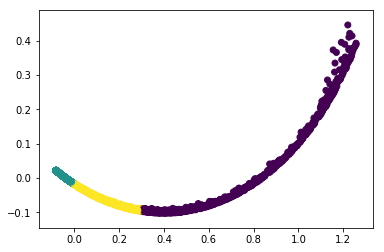

In [27]:
# Minibatch k-means using PCA

pca_minib = MiniBatchKMeans(
    init='random',
    random_state = 42,
    n_clusters=3,
    batch_size=200)

pca_minib.fit(X_pca)

pca_minib_pred = pca_minib.predict(X_pca)

pca_minib_labels = minib.labels_

print('Silhouette score for Minibatch k-means using PCA, 2 features, 3 clusters:')
print(metrics.silhouette_score(X_pca, pca_minib_labels))

# Plot the solution.
#Robin: c = is a color parameter
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_minib_pred)
plt.show()

In [28]:
#Minibatch k-means using 3 features  - 2 clusters

minib = MiniBatchKMeans(
    init='random',
    random_state = 42,
    n_clusters=2,
    batch_size=200)

minib.fit(X_norm)

minib_pred = minib.predict(X_norm)
minib_labels = minib.labels_

print('Silhouette score for Minibatch k-Means, 2 clusters:')
print(metrics.silhouette_score(X_norm, minib_labels))

Silhouette score for Minibatch k-Means, 2 clusters:
0.84959665071


In [29]:
#How many observations are in each cluster?
unique_labels, label_counts = np.unique(minib_labels, return_counts=True)
np.asarray((unique_labels, label_counts))

array([[    0,     1],
       [ 1317, 14840]])

In [30]:
#Add the cluster labels to the dataframe with all features
boston13['cluster_id'] = minib_labels

#### Descriptive statistics about finishing times

In [31]:
boston13['official'].describe()

count    16157.000000
mean       208.192250
std         23.696453
min         85.530000
25%        191.750000
50%        209.230000
75%        225.230000
max        284.230000
Name: official, dtype: float64

In the 2013 Boston Marathon, the women's winner finished in 146.25 minutes. The men's winner finished in 130.22 minutes. The wheelchair race winner finished in 85.33 minutes.

In 2018 - 19, elite runners are often defined as 155 minutes for men and 185 minutes for women.

#### How well did the two defined clusters discriminate between elite and non-elite runners?

In [32]:
boston13.groupby(['cluster_id'])['official'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_id,,,,,,,,
0,1317.0,172.504495,20.928765,85.53,160.480,167.88,191.53,202.40
1,14840.0,211.359418,21.200113,167.77,196.145,211.82,226.75,284.23


#### Now try the mean shift clustering algorithm. 

In [33]:
#Mean shift

#Use default quantile (0.3)
bandwidth = estimate_bandwidth(X_norm, n_samples=1200)

meanshft = MeanShift(bandwidth = bandwidth, bin_seeding = True)
meanshft.fit(X_norm)

# Extract cluster assignments for each data point.
meanshft_labels = meanshft.labels_

# Coordinates of the cluster centers.m
meanshft_centers = meanshft.cluster_centers_

# Count our clusters.
meanshft_nclusters_ = len(np.unique(meanshft_labels))

print("Number of estimated clusters using mean shift: {}".format(meanshft_nclusters_))

print('Silhouette score for Mean shift:')
print(metrics.silhouette_score(X_norm, meanshft_labels))

Number of estimated clusters using mean shift: 9
Silhouette score for Mean shift:
0.845921939811


In [34]:
mnshft_labels, mnshft_lbl_cts = np.unique(meanshft_labels, return_counts=True)
np.asarray((mnshft_labels, mnshft_lbl_cts))

array([[    0,     1,     2,     3,     4,     5,     6,     7,     8],
       [15478,   444,    46,    48,    79,    31,    16,     7,     8]])

In [35]:
boston13['mnshft_cluster'] = meanshft_labels

In [36]:
boston13.groupby(['mnshft_cluster'])['official'].describe()

,count,mean,std,min,25%,50%,75%,max
mnshft_cluster,,,,,,,,
0,15478.0,210.107431,21.836343,161.52,194.3200,210.510,225.9800,284.23
1,444.0,173.125856,14.259671,153.80,158.3725,180.395,186.5825,191.17
2,46.0,165.339130,13.159120,150.78,152.3550,165.620,178.2850,179.30
3,48.0,163.947292,13.556181,148.05,149.5100,174.740,176.5075,177.45
4,79.0,151.747089,19.664296,104.68,142.9400,147.680,170.8000,202.40
5,31.0,133.943226,14.875451,97.58,131.3350,135.550,139.4900,171.38
6,16.0,109.412500,20.600899,88.32,94.3275,100.145,124.1825,142.45
7,7.0,89.392857,2.788265,85.53,87.2100,90.020,91.3300,93.12
8,8.0,107.476250,19.106377,91.78,97.0475,102.975,107.1500,152.33


In [37]:
boston13['mnshft_cluster'] = pd.to_numeric(boston13['mnshft_cluster'])

In [38]:
top_clusters = boston13.loc[boston13['mnshft_cluster'] >= 5]

In [39]:
print(top_clusters[['age', 'gender', 'wheelchair', 'official', 'genderdiv', 'mnshft_cluster']].sort_values(by = ['mnshft_cluster', 'wheelchair']))

     age gender  wheelchair  official  genderdiv  mnshft_cluster
1     30      M           0    132.50          5               5
2     23      M           0    130.37          1               5
5     28      M           0    130.47          3               5
7     28      M           0    132.73          6               5
10    23      M           0    135.70         12               5
14    26      M           0    134.13          7               5
21    30      M           0    134.47          8               5
23    32      M           0    132.20          4               5
25    30      M           0    138.38         16               5
28    29      M           0    135.55         11               5
30    26      M           0    130.45          2               5
33    27      M           0    139.40         19               5
35    26      M           0    134.50          9               5
37    28      M           0    134.63         10               5
42    34      M          

In [40]:
boston13.groupby(['wheelchair', 'mnshft_cluster'])['genderdiv'].count()

wheelchair  mnshft_cluster
0           0                 15478
            1                   444
            2                    46
            3                    48
            4                    61
            5                    24
            6                     4
1           4                    18
            5                     7
            6                    12
            7                     7
            8                     8
Name: genderdiv, dtype: int64

In [41]:
boston13.groupby(['gender', 'mnshft_cluster'])['genderdiv'].count()

gender  mnshft_cluster
F       0                 6155
        1                  240
        2                   23
        3                   26
        4                   30
        5                    7
        6                    3
M       0                 9323
        1                  204
        2                   23
        3                   22
        4                   49
        5                   24
        6                   13
        7                    7
        8                    8
Name: genderdiv, dtype: int64

In [42]:
boston13.groupby(['gender', 'mnshft_cluster'])['official'].mean()

gender  mnshft_cluster
F       0                 221.669937
        1                 185.975708
        2                 178.336087
        3                 176.263846
        4                 171.316333
        5                 132.120000
        6                 112.950000
M       0                 202.473919
        1                 158.008382
        2                 152.342174
        3                 149.391364
        4                 139.765918
        5                 134.475000
        6                 108.596154
        7                  89.392857
        8                 107.476250
Name: official, dtype: float64

In [43]:
#See what happens if wheelchair racers are removed from the dataset
X_nowheel = boston13.loc[boston13['wheelchair'] == 0]

In [44]:
X_nowheel.shape

(16105, 25)

In [45]:
X_nowhl = X_nowheel.drop(dropcols, axis = 1)

In [46]:
X_nowhl_norm = pd.DataFrame(normalize(X_nowhl))

In [47]:
#Re-run mean shift w/o wheelchair racers

#Use default quantile (0.3)
bandwidth = estimate_bandwidth(X_nowhl_norm, n_samples=1200)

meanshft = MeanShift(bandwidth = bandwidth, bin_seeding = True)
meanshft.fit(X_nowhl_norm)

# Extract cluster assignments for each data point.
meanshft_nowhl_labels = meanshft.labels_

# Coordinates of the cluster centers.m
meanshft_nowhl_centers = meanshft.cluster_centers_

# Count our clusters.
meanshft_nowhl_nclusters_ = len(np.unique(meanshft_nowhl_labels))

print("Number of estimated clusters using mean shift without wheelchair racers: {}".format(meanshft_nowhl_nclusters_))

print('Silhouette score for Mean shift without wheelchair racers:')
print(metrics.silhouette_score(X_nowhl_norm, meanshft_nowhl_labels))

Number of estimated clusters using mean shift without wheelchair racers: 7
Silhouette score for Mean shift without wheelchair racers:
0.848328159505


In [48]:
mnshft_nowhl_labels, mnshft_nowhl_lbl_cts = np.unique(meanshft_nowhl_labels, return_counts=True)
np.asarray((mnshft_nowhl_labels, mnshft_lbl_cts))

array([array([0, 1, 2, 3, 4, 5, 6]),
       array([15478,   444,    46,    48,    79,    31,    16,     7,     8])], dtype=object)

In [49]:
X_nowheel['mnshft_nowhl_cluster'] = meanshft_nowhl_labels

/Users/robin/anaconda3/envs/data_sci/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
X_nowheel.groupby('mnshft_nowhl_cluster')['official'].mean()

mnshft_nowhl_cluster
0    210.107431
1    173.125856
2    165.283509
3    163.060000
4    156.427429
5    146.550000
6    134.248750
Name: official, dtype: float64

In [52]:
X_nowheel.groupby(['gender', 'mnshft_nowhl_cluster'])['official'].mean()

gender  mnshft_nowhl_cluster
F       0                       221.669937
        1                       185.975708
        2                       178.105862
        3                       175.178065
        4                       170.495000
        5                       166.797500
M       0                       202.473919
        1                       158.008382
        2                       152.003214
        3                       148.611538
        4                       144.581053
        5                       140.765000
        6                       134.248750
Name: official, dtype: float64

### Selected solution

Silhouette coefficients measure the similarity within clusters compared with the similarity between cluster. The silhouette score for mini-batch k-means with 2 clusters is similar to that using the mean shift algorithm producing 9 clusters. The silhouette coefficients in both cases have a reasonable value of about 0.85.

The mean shift algorithm seems to cluster runners accurately based on finish time, particularly when wheelchair racers are excluded. Dividing the field of 16,157 runners in this dataset into more than 2 clusters gives us more information about the range of finish times. Using the eight cluster definitions, we can analyze age, gender and country distribution with more granularity. Therefore, the mean shift algorithm is my selected solution.

### Data story